In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator,MultipleLocator
import sys
import numpy as np
import datetime as dt
import astropy.coordinates as coord
import astropy.units as u
import ephem
import pandas as pd

In [2]:
# Set up for plotting
bfsize=22
plt.rc('font',family='serif',serif='cm10')
plt.rc('text',usetex=True)
plt.rcParams['figure.figsize'] = (8,5.5)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = bfsize
plt.rcParams['axes.labelpad'] = 1.0
plt.rcParams['axes.labelweight'] = 540 # 400 is normal, 700 is bold
plt.rcParams['xtick.major.width'] = 1.4
plt.rcParams['ytick.major.width'] = 1.4
plt.rcParams['xtick.major.size'] = 0.3*bfsize
plt.rcParams['ytick.major.size'] = 0.3*bfsize
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 0.13*bfsize
plt.rcParams['ytick.minor.size'] = 0.13*bfsize
plt.rcParams['xtick.labelsize'] = 0.8*bfsize
plt.rcParams['ytick.labelsize'] = 0.8*bfsize
plt.rcParams['xtick.major.pad'] = 0.155*bfsize
plt.rcParams['ytick.major.pad'] = 0.155*bfsize
plt.rcParams['xtick.minor.pad'] = 0.155*bfsize
plt.rcParams['ytick.minor.pad'] = 0.155*bfsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = 'True'
plt.rcParams['ytick.right'] = 'True'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 1
plt.rcParams['legend.fancybox'] = 'True'
plt.rcParams['legend.fontsize'] = 0.9*bfsize
plt.rcParams['legend.labelspacing'] = 0.25
plt.rcParams['legend.handletextpad'] = 0.35
plt.rcParams['legend.borderpad'] = 0.25
plt.rcParams['legend.borderaxespad'] = 0.6
plt.rcParams['legend.columnspacing'] = 0.2
plt.rcParams['legend.frameon'] = 'True'
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['text.latex.preamble']=[r'\usepackage{txfonts}']
#plt.rcParams['text.latex.preamble']=[r'\usepackage{newtxtext,newtxmath}']
#plt.rcParams['text.latex.preamble']=[r'\usepackage[T1]{fontenc}']

# Supercalibration results

In [9]:
# Read in the supercalibration results
data = pd.read_csv('supercal_results.csv',sep=',')
data.Slope = data.Slope / 100.0

## Supercalibration results for the August 2014 run

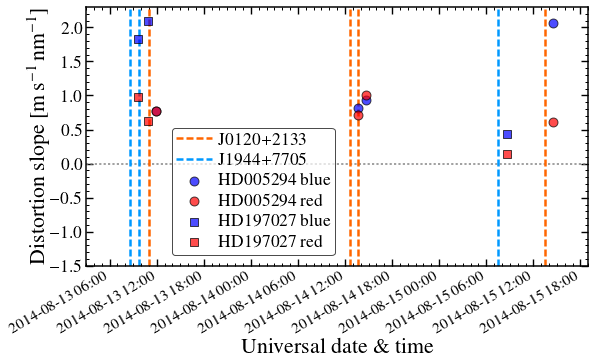

In [13]:
# Plot supercalibration slope results for the August 2014 run
fig = plt.figure(figsize=(9,5.8))
ax1 = plt.subplot2grid((100,100),(0,0),rowspan=100,colspan=100)
#ax2 = plt.subplot2grid((100,100),(0,50),rowspan=100,colspan=50,sharey=ax1)
#gs=gridspec.GridSpec(1,2,width_ratios=[1,1],wspace=None)
#ax1=plt.subplot(gs[0])
#ax2=plt.subplot(gs[1])

ymin,ymax=-1.50,2.30
yrng=ymax-ymin

xmin = dt.datetime.strptime('2014-08-13T03:00',"%Y-%m-%dT%H:%M")
xmax = dt.datetime.strptime('2014-08-15T19:00',"%Y-%m-%dT%H:%M")
xrng=xmax-xmin
ax1.hlines([0.0],xmin,xmax,colors='#848484',linestyles='dotted',linewidths=1.5)
names=[]
for i in np.arange(0,len(data),1):
    label=''
    if data.ObjName.values[i]=="J0120+2133" and data.Chip.values[i]=="b":
        if data.ObjName.values[i] not in names:
            label=r'J0120$+$2133'
            names.append(data.ObjName.values[i])
        ax1.vlines([dt.datetime.strptime(data.ObsDate.values[i],"%Y-%m-%dT%H:%M:%S.%f")],
                   ymin,ymax,colors='#ff6600',linestyles='--',linewidths=2.5,label=label)
    elif data.ObjName.values[i]=="J1944+7705" and data.Chip.values[i]=="b":
        if data.ObjName.values[i] not in names:
            label=r'J1944$+$7705'
            names.append(data.ObjName.values[i])
        ax1.vlines([dt.datetime.strptime(data.ObsDate.values[i],"%Y-%m-%dT%H:%M:%S.%f")],
                   ymin,ymax,colors='#0099ff',linestyles='--',linewidths=2.5,label=label)
    elif data.ObjName.values[i]=="HD005294":
        if data.Chip.values[i]=="b":
            color='blue'
            if "HD005294 blue" not in names:
                label=r'HD005294 blue'
                names.append("HD005294 blue")
        elif data.Chip.values[i]=="r":
            color='red'
            if "HD005294 red" not in names:
                label=r'HD005294 red'
                names.append("HD005294 red")
        ax1.scatter(dt.datetime.strptime(data.ObsDate.values[i],"%Y-%m-%dT%H:%M:%S.%f"),
                    data.Slope.values[i],marker='o',s=80.0,c=color,edgecolors='black',alpha=0.70,
                    label=label,zorder=101)
    elif data.ObjName.values[i]=="HD197027":
        if data.Chip.values[i]=="b":
            color='blue'
            if "HD197027 blue" not in names:
                label=r'HD197027 blue'
                names.append("HD197027 blue")
        elif data.Chip.values[i]=="r":
            color='red'
            if "HD197027 red" not in names:
                label=r'HD197027 red'
                names.append("HD197027 red")
        ax1.scatter(dt.datetime.strptime(data.ObsDate.values[i],"%Y-%m-%dT%H:%M:%S.%f"),
                    data.Slope.values[i],marker='s',s=80.0,c=color,edgecolors='black',alpha=0.70,
                    label=label,zorder=101)
ax1.set_xlabel(r'Universal date \& time',ha='center')
ax1.set_ylabel(r'Distortion slope [m\,s$^{-1}$\,nm$^{-1}$]',ha='center',va='bottom')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
handles, labels = ax1.get_legend_handles_labels()
leg=ax1.legend(handles,labels,bbox_to_anchor=(0.15,0.00),loc='lower left',fontsize=0.8*bfsize)
leg.get_frame().set_alpha(0.7)

plt.minorticks_on()
plt.tick_params(axis='x',which='major',labelsize=0.7*bfsize)
ax1.yaxis.set_major_locator(MultipleLocator(0.50))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
#ax1.xaxis.set_major_locator(mdates.DayLocator())
ax1.xaxis.set_major_locator(mdates.HourLocator(np.arange(0,25,6)))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d  %H:%M'))
ax1.xaxis.set_minor_locator(mdates.HourLocator(np.arange(0,25,1)))
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d %H:%M')
fig.subplots_adjust(bottom=0.26,wspace=0.0,hspace=0.0)
fig.autofmt_xdate(bottom=0.26,rotation=30,ha='right')

# Export to PDF and crop it for publication
#plt.savefig('supercal_Aug14.pdf',bbox_inches='tight',pad_inches=0.05)

## Supercalibration results for the December 2012 run

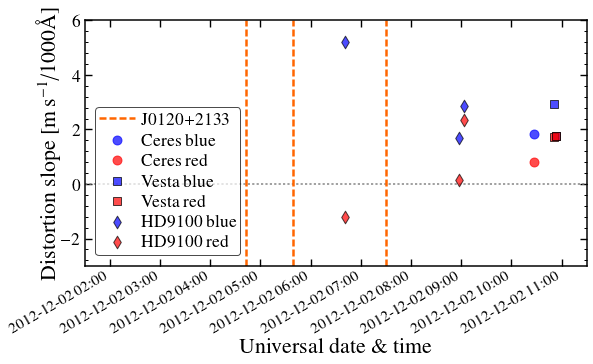

In [16]:
# Plot supercalibration slope results for the December 2012 run
fig = plt.figure(figsize=(9,5.5))
ax1 = plt.subplot2grid((100,100),(0,0),rowspan=100,colspan=100)
#ax2 = plt.subplot2grid((100,100),(0,50),rowspan=100,colspan=50,sharey=ax1)
#gs=gridspec.GridSpec(1,2,width_ratios=[1,1],wspace=None)
#ax1=plt.subplot(gs[0])
#ax2=plt.subplot(gs[1])

ymin,ymax=-3.00,6.00
yrng=ymax-ymin

xmin = dt.datetime.strptime('2012-12-02T01:30',"%Y-%m-%dT%H:%M")
xmax = dt.datetime.strptime('2012-12-02T11:30',"%Y-%m-%dT%H:%M")
xrng=xmax-xmin
ax1.hlines([0.0],xmin,xmax,colors='#848484',linestyles='dotted',linewidths=1.5)
names=[]
for i in np.arange(0,len(data),1):
    label=''
    if data.ObjName.values[i]=="J0120+2133" and data.Chip.values[i]=="b":
        if data.ObjName.values[i] not in names:
            label=r'J0120$+$2133'
            names.append(data.ObjName.values[i])
        ax1.vlines([dt.datetime.strptime(data.ObsDate.values[i],"%Y-%m-%dT%H:%M:%S.%f")],
                   ymin,ymax,colors='#ff6600',linestyles='--',linewidths=2.5,label=label)
    elif data.ObjName.values[i]=="Ceres":
        if data.Chip.values[i]=="b":
            color='blue'
            if "Ceres blue" not in names:
                label=r'Ceres blue'
                names.append("Ceres blue")
        elif data.Chip.values[i]=="r":
            color='red'
            if "Cered red" not in names:
                label=r'Ceres red'
                names.append("Ceres red")
        ax1.scatter(dt.datetime.strptime(data.ObsDate.values[i],"%Y-%m-%dT%H:%M:%S.%f"),
                    data.Slope.values[i],marker='o',s=80.0,c=color,alpha=0.70,label=label,
                   zorder=101)
    elif data.ObjName.values[i]=="Vesta":
        if data.Chip.values[i]=="b":
            color='blue'
            if "Vesta blue" not in names:
                label=r'Vesta blue'
                names.append("Vesta blue")
        elif data.Chip.values[i]=="r":
            color='red'
            if "Vesta red" not in names:
                label=r'Vesta red'
                names.append("Vesta red")
        ax1.scatter(dt.datetime.strptime(data.ObsDate.values[i],"%Y-%m-%dT%H:%M:%S.%f"),
                    data.Slope.values[i],marker='s',s=80.0,c=color,edgecolors='black',alpha=0.70,
                    label=label,zorder=101)
    elif data.ObjName.values[i]=="HD9100":
        if data.Chip.values[i]=="b":
            color='blue'
            if "HD9100 blue" not in names:
                label=r'HD9100 blue'
                names.append("HD9100 blue")
        elif data.Chip.values[i]=="r":
            color='red'
            if "HD9100 red" not in names:
                label=r'HD9100 red'
                names.append("HD9100 red")
        ax1.scatter(dt.datetime.strptime(data.ObsDate.values[i],"%Y-%m-%dT%H:%M:%S.%f"),
                    data.Slope.values[i],marker='d',s=80.0,c=color,edgecolors='black',alpha=0.70,
                    label=label,zorder=101)
ax1.set_xlabel(r'Universal date \& time',ha='center')
ax1.set_ylabel(r'Distortion slope [m\,s$^{-1}$/1000\AA]',ha='center',va='bottom')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
handles, labels = ax1.get_legend_handles_labels()
leg=ax1.legend(handles,labels,bbox_to_anchor=(0.00,0.00),loc='lower left',fontsize=0.8*bfsize)
leg.get_frame().set_alpha(0.7)

plt.minorticks_on()
plt.tick_params(axis='x',which='major',labelsize=0.7*bfsize)
#ax1.xaxis.set_minor_locator(AutoMinorLocator(7))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
#ax1.xaxis.set_major_locator(mdates.DayLocator())
ax1.xaxis.set_major_locator(mdates.HourLocator(np.arange(0,25,1)))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d  %H:%M'))
ax1.xaxis.set_minor_locator(mdates.HourLocator(np.arange(0,25.0,0.25)))
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d %H:%M')
fig.subplots_adjust(bottom=0.26,wspace=0.0,hspace=0.0)
fig.autofmt_xdate(bottom=0.26,rotation=30,ha='right')

# Export to PDF and crop it for publication
#plt.savefig('supercal_Dec12.pdf',bbox_inches='tight',pad_inches=0.05)

## Slit-shift results

In [3]:
# Read in the slit-shift results
data = pd.read_csv('slitshift_results.csv',sep=',')

## Slit-shift results for all three runs in one plot

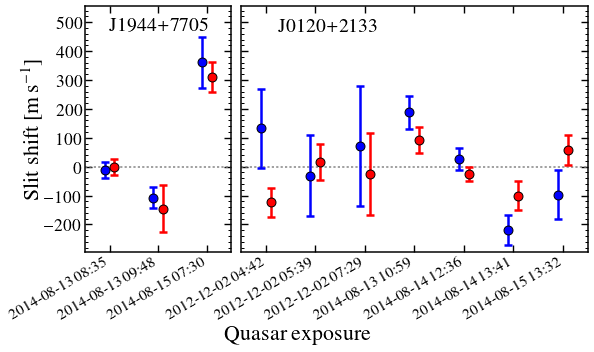

In [16]:
# Plot supercalibration slope results for the August 2014 run
fig = plt.figure(figsize=(9,5.5))
ax1 = plt.subplot2grid((100,100),(0,0),rowspan=100,colspan=29)
ax2 = plt.subplot2grid((100,100),(0,31),rowspan=100,colspan=69,sharey=ax1)

ymin, ymax =-295,555
yrng = ymax-ymin

x=np.array(np.arange(0,len(data[(data.ObjName.values=="J1944+7705") & (data.Chip.values=="b")])))
xmin, xmax = x[0]-0.5, x[len(x)-1]+0.5
xrng = xmax-xmin
x1labs = []
for ObsDate in data[(data.ObjName.values=="J1944+7705") & (data.Chip.values=="b")].ObsDate.values:
    x1labs.append(dt.datetime.strptime(ObsDate,"%Y-%m-%dT%H:%M:%S.%f").strftime('%Y-%m-%d  %H:%M'))
ax1.hlines([0.0],xmin,xmax,colors='#848484',linestyles='dotted',linewidths=1.5)
ax1.errorbar(x-0.1,data[(data.ObjName.values=="J1944+7705") & (data.Chip.values=="b")].Shift.values,
             yerr=data[(data.ObjName.values=="J1944+7705") & (data.Chip.values=="b")].ShiftUnc.values,
             fmt='',ls='none',color='blue',elinewidth=2.5,capsize=4.0,mew=2.5,zorder=100)
ax1.scatter(x-0.1,data[(data.ObjName.values=="J1944+7705") & (data.Chip.values=="b")].Shift.values,
            marker='o',s=80.0,c='blue',edgecolors='black',alpha=1.00,zorder=101)
ax1.errorbar(x+0.1,data[(data.ObjName.values=="J1944+7705") & (data.Chip.values=="r")].Shift.values,
             yerr=data[(data.ObjName.values=="J1944+7705") & (data.Chip.values=="r")].ShiftUnc.values,
             fmt='',ls='none',color='red',elinewidth=2.5,capsize=4.0,mew=2.5,zorder=100)
ax1.scatter(x+0.1,data[(data.ObjName.values=="J1944+7705") & (data.Chip.values=="r")].Shift.values,
            marker='o',s=80.0,c='red',edgecolors='black',alpha=1.00,zorder=101)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_ylabel(r'Slit shift [m\,s$^{-1}$]',ha='center',va='bottom')
ax1.annotate(r'J1944$+$7705',xy=(0.50,0.92),xycoords='axes fraction',ha='center',va='center',fontsize=0.9*bfsize)
ax1.yaxis.set_major_locator(MultipleLocator(100))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.axes(ax1)
plt.xticks(x,x1labs,rotation=30,ha='right')
plt.tick_params(axis='x',which='major',labelsize=0.7*bfsize)

x=np.array(np.arange(0,len(data[(data.ObjName.values=="J0120+2133") & (data.Chip.values=="b")])))
xmin, xmax = x[0]-0.5, x[len(x)-1]+0.5
xrng = xmax-xmin
x2labs = []
for ObsDate in data[(data.ObjName.values=="J0120+2133") & (data.Chip.values=="b")].ObsDate.values:
    x2labs.append(dt.datetime.strptime(ObsDate,"%Y-%m-%dT%H:%M:%S.%f").strftime('%Y-%m-%d  %H:%M'))
ax2.hlines([0.0],xmin,xmax,colors='#848484',linestyles='dotted',linewidths=1.5)
ax2.errorbar(x-0.1,data[(data.ObjName.values=="J0120+2133") & (data.Chip.values=="b")].Shift.values,
             yerr=data[(data.ObjName.values=="J0120+2133") & (data.Chip.values=="b")].ShiftUnc.values,
             fmt='',ls='none',color='blue',elinewidth=2.5,capsize=4.0,mew=2.5,zorder=100)
ax2.scatter(x-0.1,data[(data.ObjName.values=="J0120+2133") & (data.Chip.values=="b")].Shift.values,
            marker='o',s=80.0,c='blue',edgecolors='black',alpha=1.00,zorder=101)
ax2.errorbar(x+0.1,data[(data.ObjName.values=="J0120+2133") & (data.Chip.values=="r")].Shift.values,
             yerr=data[(data.ObjName.values=="J0120+2133") & (data.Chip.values=="r")].ShiftUnc.values,
             fmt='',ls='none',color='red',elinewidth=2.5,capsize=4.0,mew=2.5,zorder=100)
ax2.scatter(x+0.1,data[(data.ObjName.values=="J0120+2133") & (data.Chip.values=="r")].Shift.values,
            marker='o',s=80.0,c='red',edgecolors='black',alpha=1.00,zorder=101)
ax2.set_xlim(xmin,xmax)

ax2.annotate(r'J0120$+$2133',xy=(0.25,0.92),xycoords='axes fraction',ha='center',va='center',fontsize=0.9*bfsize)
ax2.annotate(r'Quasar exposure',xy=(0.5,0.05),xycoords='figure fraction',ha='center',va='center',fontsize=bfsize)
plt.axes(ax2)
plt.xticks(x,x2labs,rotation=30,ha='right')
plt.tick_params(axis='x',which='major',labelsize=0.7*bfsize)
for ax in [ax2]:
    plt.setp(ax.get_yticklabels(),visible=False)
fig.subplots_adjust(bottom=0.26,wspace=0.0,hspace=0.0)
# Export to PDF and crop it for publication
#plt.savefig('slitshifts.pdf',bbox_inches='tight',pad_inches=0.05)

# Delta(alpha)/alpha results

In [3]:
# Read in da/a results
data = np.genfromtxt("tab_alpha_results.tex",usecols=(0,2,5,8,11,14,16,18,20,23,24,25,26,27,28,29),
                     dtype=None,skip_header=3,skip_footer=2,comments='%#',names=True)
quasar, zabs, da, eda, lrdeda, iodeda, dispeda, seda, chi, tel, ra, dec, Theta, dadip, edadip, ref = \
    np.array([x.decode("UTF-8") for x in data['quasar']]), np.array([x.decode("UTF-8") for x in data['zabs']]),\
    data['da'], data['eda'], data['lrdeda'], data['iodeda'], data['dispeda'], data['seda'], data['chi'],\
    np.array([x.decode("UTF-8") for x in data['tel']]),np.array([x.decode("UTF-8") for x in data['ra']]),\
    np.array([x.decode("UTF-8") for x in data['dec']]),data['Theta_dip'], data['da_dip'], data['eda_dip'],\
    np.array([x.decode("UTF-8") for x in data['ref']])
quasar = np.chararray.replace(quasar,"%","")
teda = (eda*eda+seda*seda)**0.5
ra = coord.Angle(ra,unit=u.hour)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(dec,unit=u.degree)

## Delta(alpha)/alpha results versus redshift for this work only

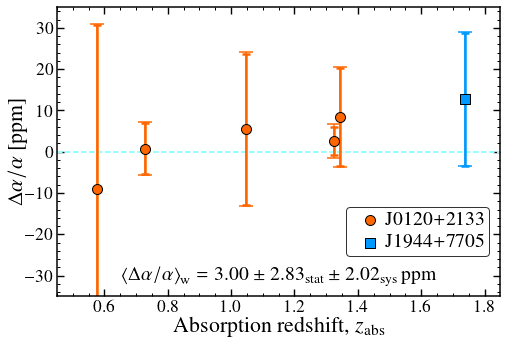

In [4]:
# Plot this work's results only
fig = plt.figure()
ax1 = plt.subplot2grid((100,100),(0,0),rowspan=100,colspan=100)
xmin, xmax = 0.45, 1.85
xrng = xmax-xmin
ymin, ymax = -35.0, 35.0
yrng = ymax-ymin

# Weighted mean da/a for this sample only
sel=[(ref=='This_work') & (((quasar=='J0120$+$2133') & (zabs=='Ave.')) | (quasar=='J1944$+$7705'))]
y, stat, tot = da[sel], eda[sel], teda[sel]
wght = 1.0/stat/stat
twght = 1.0/tot/tot
wmda = np.average(y,weights=twght)
wmeda = 1.0/np.sqrt(np.sum(wght))
wmteda = 1.0/np.sqrt(np.sum(twght))
wmseda = np.sqrt(wmteda*wmteda-wmeda*wmeda)

ax1.hlines([0.0],xmin,xmax,colors='#99ffff',linestyles='--',linewidths=2.0)
# J0120+2133
sel=[(ref=='This_work') & (quasar=='J0120$+$2133') & (zabs!='Ave.')]
x, y, ye = zabs[sel].astype(np.float), da[sel], teda[sel]
ax1.errorbar(x,y,yerr=[ye,ye],fmt='',ls='none',color='#ff6600',elinewidth=1.5,capsize=7.0,mew=1.5)
ye = eda[sel]
ax1.errorbar(x,y,yerr=[ye,ye],fmt='',ls='none',color='#ff6600',elinewidth=2.5,capsize=4.0,mew=2.5)
ax1.scatter(x,y,marker='o',s=100.0,c='#ff6600',edgecolors='black',zorder=100,label=r'J0120$+$2133')
# J1944+7705
sel=[(ref=='This_work') & (quasar=='J1944$+$7705')]
x, y, ye = zabs[sel].astype(np.float), da[sel], teda[sel]
ax1.errorbar(x,y,yerr=[ye,ye],fmt='',ls='none',color='#0099ff',elinewidth=1.5,capsize=7.0,mew=1.5)
ye = eda[sel]
ax1.errorbar(x,y,yerr=[ye,ye],fmt='',ls='none',color='#0099ff',elinewidth=2.5,capsize=4.0,mew=2.5)
ax1.scatter(x,y,marker='s',s=100.0,c='#0099ff',edgecolors='black',zorder=100,label=r'J1944$+$7705')

ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'Absorption redshift, $z_{\mathrm{abs}}$',labelpad=5.0)
ax1.set_ylabel(r'$\Delta\alpha/\alpha$ [ppm]',labelpad=-2.0)
ax1.annotate(r'$\left<\Delta\alpha/\alpha\right>_{\mathrm{w}}=%.2lf\pm%.2lf_{\mathrm{stat}}\pm%.2lf_{\mathrm{sys}}$\,ppm'\
             % (wmda,wmeda,wmseda),xy=(0.50,0.06),xycoords='axes fraction',horizontalalignment='center',
             verticalalignment='center',fontsize=0.9*bfsize)
handles, labels = ax1.get_legend_handles_labels()
#leg=ax1.legend(handles,labels,loc=4)
leg=ax1.legend(handles,labels,bbox_to_anchor=(1.0,0.35),handletextpad=-0.2,borderpad=0.2)

plt.minorticks_on()
fig.subplots_adjust(left=0.13,bottom=0.15,wspace=0.0,hspace=0.0)

# Export to PDF and crop it for publication
#plt.savefig('da_vs_z.pdf',bbox_inches='tight',pad_inches=0.05)

## Delta(alpha)/alpha results versus redshift for recent, "reliable" constraints

In [5]:
# Alter some default plot settings
plt.rcParams['xtick.labelsize'] = 0.8*bfsize
plt.rcParams['ytick.labelsize'] = 0.8*bfsize
plt.rcParams['legend.fontsize'] = 0.8*bfsize
plt.rcParams['legend.labelspacing'] = 0.11
plt.rcParams['legend.handletextpad'] = 0.4
plt.rcParams['legend.borderpad'] = 0.01
plt.rcParams['legend.borderaxespad'] = 0.35

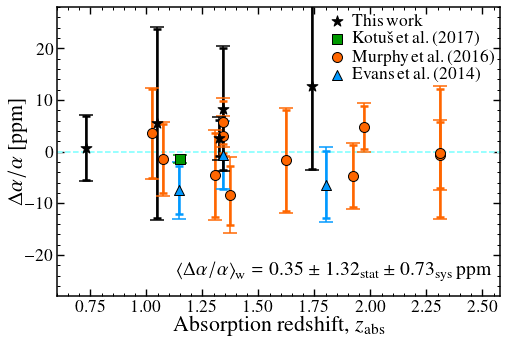

In [6]:
# Plot all results from recent papers where long-range distortions have been corrected or are unimportant
fig = plt.figure()
ax1 = plt.subplot2grid((100,100),(0,0),rowspan=100,colspan=100)
xmin, xmax = 0.60, 2.58
xrng = xmax-xmin
ymin, ymax = -28.0, 28.0
yrng = ymax-ymin

# Weighted mean da/a for the entire sample
sel1=[(ref=='This_work') & (((quasar=='J0120$+$2133') & (zabs=='Ave.')) | (quasar=='J1944$+$7705'))]
sel2=[(ref=='Murphy_et_al._(2016)') &
     (((quasar!='PHL957') & (quasar!='J0841$+$0312')) |
      (((quasar=='PHL957') & (zabs=='2.309Ave.')) | ((quasar=='J0841$+$0312') & (zabs=='1.342Ave.'))))]
sel3=[ref=='Kotus_et_al._(2016)']
sel4=[(ref=='Evans_et_al._(2014)') & (zabs=='Ave.')]
y, e, t = da[sel1], eda[sel1], teda[sel1]
y, e, t = np.append(y,da[sel2]), np.append(e,eda[sel2]), np.append(t,teda[sel2])
y, e, t = np.append(y,da[sel3]), np.append(e,eda[sel3]), np.append(t,teda[sel3])
y, e, t = np.append(y,da[sel4]), np.append(e,eda[sel4]), np.append(t,teda[sel4])
wght = 1.0/e/e
twght = 1.0/t/t
wmda = np.average(y,weights=twght)
wmeda = 1.0/np.sqrt(np.sum(wght))
wmteda = 1.0/np.sqrt(np.sum(twght))
wmseda = np.sqrt(wmteda*wmteda-wmeda*wmeda)

ax1.hlines([0.0],xmin,xmax,colors='#99ffff',linestyles='--',linewidths=2.0)
# Evans et al. (2014) results
sel=[(ref=='Evans_et_al._(2014)') & (zabs!='Ave.')]
x, y, e, t = zabs[sel].astype(np.float), da[sel], eda[sel], teda[sel]
ax1.errorbar(x,y,yerr=[t,t],fmt='',ls='none',color='#0099ff',elinewidth=1.5,capsize=7.0,mew=1.5)
ax1.errorbar(x,y,yerr=[e,e],fmt='',ls='none',color='#0099ff',elinewidth=2.5,capsize=4.0,mew=2.5)
ax1.scatter(x,y,marker='^',s=100.0,c='#0099ff',edgecolors='black',zorder=100,label=r'Evans\,et\,al.\,(2014)')
# Murphy et al. (2016) results
sel=[(ref=='Murphy_et_al._(2016)') &
     (((quasar!='PHL957') & (quasar!='J0841$+$0312')) |
      (((quasar=='PHL957') & (zabs!='2.309Ave.')) | ((quasar=='J0841$+$0312') & (zabs!='1.342Ave.'))))]
x, y, e, t = zabs[sel].astype(np.float), da[sel], eda[sel], teda[sel]
ax1.errorbar(x,y,yerr=[t,t],fmt='',ls='none',color='#ff6600',elinewidth=1.5,capsize=7.0,mew=1.5)
ax1.errorbar(x,y,yerr=[e,e],fmt='',ls='none',color='#ff6600',elinewidth=2.5,capsize=4.0,mew=2.5)
ax1.scatter(x,y,marker='o',s=100.0,c='#ff6600',edgecolors='black',zorder=100,label=r'Murphy\,et\,al.\,(2016)')
# Kotus et al. (2017) result
sel=[ref=='Kotus_et_al._(2017)']
x, y, e, t = zabs[sel].astype(np.float), da[sel], eda[sel], teda[sel]
ax1.errorbar(x,y,yerr=[t,t],fmt='',ls='none',color='#009900',elinewidth=1.5,capsize=7.0,mew=1.5)
ax1.errorbar(x,y,yerr=[e,e],fmt='',ls='none',color='#009900',elinewidth=2.5,capsize=4.0,mew=2.5)
ax1.scatter(x,y,marker='s',s=100.0,c='#009900',edgecolors='black',zorder=100,label=r'Kotu\v{s}\,et\,al.\,(2017)')
# This work's results
sel=[(ref=='This_work') & (((quasar=='J0120$+$2133') & (zabs!='Ave.')) | (quasar=='J1944$+$7705'))]
x, y, e, t = zabs[sel].astype(np.float), da[sel], eda[sel], teda[sel]
ax1.errorbar(x,y,yerr=[t,t],fmt='',ls='none',color='black',elinewidth=1.5,capsize=7.0,mew=1.5)
ax1.errorbar(x,y,yerr=[e,e],fmt='',ls='none',color='black',elinewidth=2.5,capsize=4.0,mew=2.5)
ax1.scatter(x,y,marker='*',s=130.0,c='black',edgecolors='black',zorder=100,label=r'This\,work')

ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'Absorption redshift, $z_{\mathrm{abs}}$',labelpad=4.0)
ax1.set_ylabel(r'$\Delta\alpha/\alpha$ [ppm]',labelpad=-2.0)
ax1.annotate(r'$\left<\Delta\alpha/\alpha\right>_{\mathrm{w}}=%.2lf\pm%.2lf_{\mathrm{stat}}\pm%.2lf_{\mathrm{sys}}$\,ppm'\
             % (wmda,wmeda,wmseda),xy=(0.98,0.08),xycoords='axes fraction',horizontalalignment='right',
             verticalalignment='center',fontsize=0.9*bfsize)
# Reverse the order of legend labels
handles, labels = ax1.get_legend_handles_labels()
leg=ax1.legend(handles[::-1],labels[::-1],loc=1,handlelength=1.0,frameon=False)

plt.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
fig.subplots_adjust(left=0.13,bottom=0.15,wspace=0.0,hspace=0.0)

# Export to PDF and crop it for publication
#plt.savefig('da_vs_z_all.pdf',bbox_inches='tight',pad_inches=0.05)

## Sight-line positions and King et al. (2012) dipole on an all-sky map

In [7]:
# Alter some default plot settings
plt.rcParams['xtick.labelsize'] = 0.7*bfsize
plt.rcParams['ytick.labelsize'] = 0.7*bfsize
plt.rcParams['legend.fontsize'] = 0.8*bfsize
plt.rcParams['legend.labelspacing'] = 0.11
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['legend.borderpad'] = -0.5
plt.rcParams['legend.borderaxespad'] = 0.40
plt.rcParams['legend.columnspacing'] = 0.5

Chisq. around dipole model: 11.444


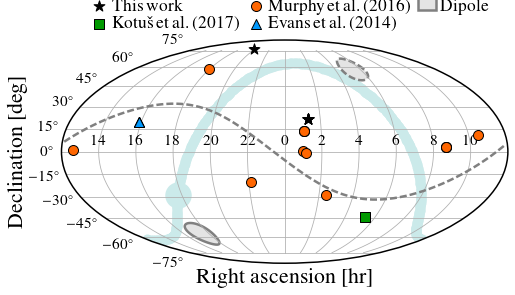

In [19]:
fig = plt.figure(figsize=(8,7.0))
ax1 = plt.subplot2grid((100,100),(0,0),rowspan=100,colspan=100,projection="mollweide")

# Chisq. between da and dipole predictions
sel1=[(ref=='This_work') & (((quasar=='J0120$+$2133') & (zabs=='Ave.')) | (quasar=='J1944$+$7705'))]
sel2=[(ref=='Murphy_et_al._(2016)') &
     (((quasar!='PHL957') & (quasar!='J0841$+$0312')) |
      (((quasar=='PHL957') & (zabs=='2.309Ave.')) | ((quasar=='J0841$+$0312') & (zabs=='1.342Ave.'))))]
sel3=[ref=='Kotus_et_al._(2017)']
sel4=[(ref=='Evans_et_al._(2014)') & (zabs=='Ave.')]
y, e, m = da[sel1], teda[sel1], dadip[sel1]
y, e, m = np.append(y,da[sel2]), np.append(e,teda[sel2]), np.append(m,dadip[sel2])
y, e, m = np.append(y,da[sel3]), np.append(e,teda[sel3]), np.append(m,dadip[sel3])
y, e, m = np.append(y,da[sel4]), np.append(e,teda[sel4]), np.append(m,dadip[sel4])
wght = 1.0/e/e
chisq = np.sum((y-m)*(y-m)*wght)
chisq = np.sum((y)*(y)*wght)
print('Chisq. around dipole model: {0:.3f}'.format(chisq))

sel=[ref=='Evans_et_al._(2014)']
ax1.scatter(ra.radian[sel],dec.radian[sel],marker='^',s=100.0,c='#0099ff',edgecolors='black',zorder=100,
            label=r'Evans\,et\,al.\,(2014)')
sel=[ref=='Murphy_et_al._(2016)']
ax1.scatter(ra.radian[sel],dec.radian[sel],marker='o',s=100.0,c='#ff6600',edgecolors='black',zorder=100,
            label=r'Murphy\,et\,al.\,(2016)')
sel=[ref=='Kotus_et_al._(2017)']
ax1.scatter(ra.radian[sel],dec.radian[sel],marker='s',s=100.0,c='#009900',edgecolors='black',zorder=100,
            label=r'Kotu\v{s}\,et\,al.\,(2017)')
sel=[ref=='This_work']
ax1.scatter(ra.radian[sel],dec.radian[sel],marker='*',s=130.0,c='black',edgecolors='black',zorder=100,
            label=r'This\,work')

ax1.set_xticklabels(['14','16','18','20','22','0','2','4','6','8','10'])

# Draw the galactic plane and bulge
lon_array = np.arange(0,360,1)
lat = 0.
eq_array = np.zeros((360,2))
for lon in lon_array:
    ga = ephem.Galactic(np.radians(lon),np.radians(lat))
    eq = ephem.Equatorial(ga)
    eq_array[lon] = np.degrees(eq.get())
gRA, gDec = eq_array[:,0], eq_array[:,1]
gRA = coord.Angle(gRA,unit=u.degree)
gRA = gRA.wrap_at(180*u.degree)
gDec = coord.Angle(gDec,unit=u.degree)
ax1.scatter(gRA.radian,gDec.radian,marker='o',s=100.0,c="#CBEAEA",linewidth=0)
ax1.scatter(gRA.radian[0],gDec.radian[0],marker='o',s=700.0,c="#CBEAEA",linewidth=0)
# Draw anti-pole error ellipse
dRAc, dRAe = 5.4, 2*0.9 # [hr]
dDecc, dDece = 58.0, 2*9.0 # [deg]
dang = 0.0 # Angle of ellipse is zero here
theta = np.arange(0.0,360.0,1.0)*np.pi/180.0
dRA, dDec = 0.5*dRAe*np.cos(theta), 0.5*dDece*np.sin(theta)
rtheta = np.radians(dang)
R = np.array([[np.cos(rtheta),-np.sin(rtheta)],[np.sin(rtheta),np.cos(rtheta)]])
dRA, dDec = np.dot(R,np.array([dRA,dDec]))
dRA += dRAc
dDec += dDecc
dRA = coord.Angle(dRA,unit=u.hour)
dRA = dRA.wrap_at(180*u.degree)
dDec = coord.Angle(dDec,unit=u.degree)
ax1.fill(dRA.radian,dDec.radian,facecolor='#E4E4E4',edgecolor='grey',ls='--',lw=2.5)
# Draw dipole pole error ellipse
dRAc, dRAe = 17.4, 2*0.9 # [hr]
dDecc, dDece = -58.0, 2*9.0 # [deg]
dang = 0.0 # Angle of ellipse is zero here
theta = np.arange(0.0,360.0,1.0)*np.pi/180.0
dRA, dDec = 0.5*dRAe*np.cos(theta), 0.5*dDece*np.sin(theta)
rtheta = np.radians(dang)
R = np.array([[np.cos(rtheta),-np.sin(rtheta)],[np.sin(rtheta),np.cos(rtheta)]])
dRA, dDec = np.dot(R,np.array([dRA,dDec]))
dRA += dRAc
dDec += dDecc
dRA = coord.Angle(dRA,unit=u.hour)
dRA = dRA.wrap_at(180*u.degree)
dDec = coord.Angle(dDec,unit=u.degree)
ax1.fill(dRA.radian,dDec.radian,facecolor='#E4E4E4',edgecolor='grey',ls='-',lw=2.5,label='Dipole')
# Draw dipole equator
dRAe = coord.Angle(np.concatenate((np.arange(12.1,24.0,0.1),np.arange(0.0,12.0,0.1)),axis=0),unit=u.hour)
dDece = np.arctan(-np.cos(coord.Angle(dRAc,unit=u.hour).radian-dRAe.radian)/\
                np.tan(coord.Angle(dDecc,unit=u.degree).radian))
dRAe = dRAe.wrap_at(180*u.degree)
dDece = coord.Angle(dDece,unit=u.radian)
ax1.plot(dRAe.radian,dDece.radian,c='grey',ls='--',lw=2.5)
ax1.grid(True)
ax1.set_xlabel("Right ascension [hr]",fontsize=bfsize,labelpad=5)
ax1.set_ylabel("Declination [deg]",fontsize=bfsize)
handles, labels = ax1.get_legend_handles_labels()
# Reverse the order of legend labels
leg=ax1.legend(handles[::-1],labels[::-1],loc=1,ncol=3,handlelength=1.0,frameon=False,bbox_to_anchor=(0.95,1.18))

# Export to PDF and crop it for publication
#plt.savefig('skymap.pdf',bbox_inches='tight',pad_inches=0.16)

## Delta(alpha)/alpha results versus angle from dipole direction

In [24]:
# Read in variation of da/a with angle from dipole for the dipole-only model
data = np.genfromtxt("dipole_err.dat",usecols=(0,1,2),dtype=None)
angle, dapred, edapred = [np.zeros(0) for n in range(3)]
for i in np.arange(0,len(data),1):
    angle=np.append(angle,data[i][0])
    dapred=np.append(dapred,data[i][1])
    edapred=np.append(edapred,data[i][2])

In [25]:
# Alter some default plot settings
plt.rcParams['xtick.labelsize'] = 0.8*bfsize
plt.rcParams['ytick.labelsize'] = 0.8*bfsize
plt.rcParams['legend.fontsize'] = 0.8*bfsize
plt.rcParams['legend.labelspacing'] = 0.11
plt.rcParams['legend.handletextpad'] = 0.4
plt.rcParams['legend.borderpad'] = 0.01
plt.rcParams['legend.borderaxespad'] = 0.35

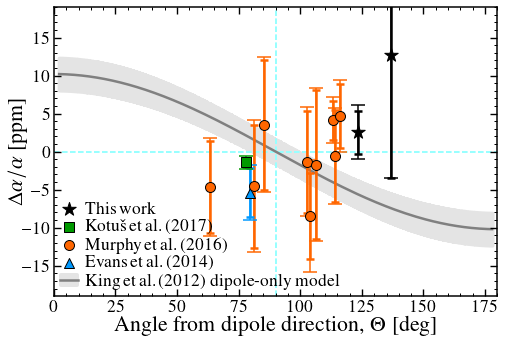

In [28]:
fig = plt.figure(figsize=(8,5.5))
ax1 = plt.subplot2grid((100,100),(0,0),rowspan=100,colspan=100)
xmin, xmax = 0.0, 180.0
xrng = xmax-xmin
ymin, ymax = -19.0, 19.0
yrng = ymax-ymin
ax1.hlines([0.0],xmin,xmax,colors='#99ffff',linestyles='--',linewidths=2.0,zorder=1)
ax1.vlines([90.0],ymin,ymax,colors='#99ffff',linestyles='--',linewidths=2.0,zorder=1)
ax1.fill_between(angle,dapred+edapred,dapred-edapred,lw=4.0,color='#E4E4E4',alpha=1.0,
                 zorder=0,rasterized=True)
ax1.plot(angle,dapred,ls='-',lw=2.5,color='grey',rasterized=True,
         label=r'King\,et\,al.\,(2012) dipole-only model',zorder=1)

# Evans et al. (2014) results
sel=[(ref=='Evans_et_al._(2014)') & (zabs=='Ave.')]
x, y, e, t = Theta[sel], da[sel], eda[sel], teda[sel]
ax1.errorbar(x,y,yerr=[t,t],fmt='',ls='none',color='#0099ff',elinewidth=1.5,capsize=7.0,mew=1.5)
ax1.errorbar(x,y,yerr=[e,e],fmt='',ls='none',color='#0099ff',elinewidth=2.5,capsize=4.0,mew=2.5)
ax1.scatter(x,y,marker='^',s=100.0,c='#0099ff',edgecolors='black',zorder=100,label=r'Evans\,et\,al.\,(2014)')
# Murphy et al. (2016) results
sel=[(ref=='Murphy_et_al._(2016)') &
     (((quasar!='PHL957') & (quasar!='J0841$+$0312')) |
      (((quasar=='PHL957') & (zabs=='2.309Ave.')) | ((quasar=='J0841$+$0312') & (zabs=='1.342Ave.'))))]
x, y, e, t = Theta[sel], da[sel], eda[sel], teda[sel]
ax1.errorbar(x,y,yerr=[t,t],fmt='',ls='none',color='#ff6600',elinewidth=1.5,capsize=7.0,mew=1.5)
ax1.errorbar(x,y,yerr=[e,e],fmt='',ls='none',color='#ff6600',elinewidth=2.5,capsize=4.0,mew=2.5)
ax1.scatter(x,y,marker='o',s=100.0,c='#ff6600',edgecolors='black',zorder=100,label=r'Murphy\,et\,al.\,(2016)')
# Kotus et al. (2017) result
sel=[ref=='Kotus_et_al._(2017)']
x, y, e, t = Theta[sel], da[sel], eda[sel], teda[sel]
ax1.errorbar(x,y,yerr=[t,t],fmt='',ls='none',color='#009900',elinewidth=1.5,capsize=7.0,mew=1.5)
ax1.errorbar(x,y,yerr=[e,e],fmt='',ls='none',color='#009900',elinewidth=2.5,capsize=4.0,mew=2.5)
ax1.scatter(x,y,marker='s',s=100.0,c='#009900',edgecolors='black',zorder=100,label=r'Kotu\v{s}\,et\,al.\,(2017)')
# This work's results
sel=[(ref=='This_work') & (((quasar=='J0120$+$2133') & (zabs=='Ave.')) | (quasar=='J1944$+$7705'))]
x, y, e, t = Theta[sel], da[sel], eda[sel], teda[sel]
ax1.errorbar(x,y,yerr=[t,t],fmt='',ls='none',color='black',elinewidth=1.5,capsize=7.0,mew=1.5)
ax1.errorbar(x,y,yerr=[e,e],fmt='',ls='none',color='black',elinewidth=2.5,capsize=4.0,mew=2.5)
ax1.scatter(x,y,marker='*',s=200.0,c='black',edgecolors='black',zorder=100,label=r'This\,work')

ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'Angle from dipole direction, $\Theta$ [deg]')
ax1.set_ylabel(r'$\Delta\alpha/\alpha$ [ppm]',labelpad=-5.0)
handles, labels = ax1.get_legend_handles_labels()
ax1.fill_between([2.85,9.45],[-16.2,-16.2],[-17.5,-17.5],lw=4.0,color='#E4E4E4',rasterized=True)
# Reverse the order of legend labels
leg=ax1.legend(handles[::-1],labels[::-1],loc=3,handlelength=1.0,frameon=False)
plt.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
fig.subplots_adjust(left=0.13,bottom=0.15,wspace=0.0,hspace=0.0)

# Export to PDF and crop it for publication
#plt.savefig('da_vs_theta.pdf',dpi=200,bbox_inches='tight',pad_inches=0.05)